In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output, HTML
from matplotlib.animation import FuncAnimation
import json
from tqdm import tqdm
import time
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [6]:
df = pd.read_csv('./../Data/data.csv')

In [10]:
route_setting = 'trafast'
total_route = [
    (0, 39), (39, 40), (40, 50), (50, 29), (29, 19), (19, 14), (14, 63), (63, 55), (55, 0)    
]

100%|██████████| 9/9 [00:10<00:00,  1.16s/it]


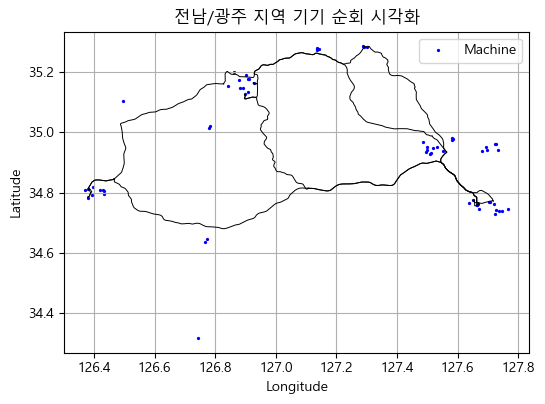

In [12]:
# figsize 비율 계산
ratio = (df.latitude.max() - df.latitude.min()) / (df.longitude.max() - df.longitude.min())
scale = 6

# fig, ax 객체 생성
fig, ax = plt.subplots(figsize=(scale, scale * ratio))

# 데이터 플롯
ax.scatter(df['longitude'], df['latitude'], s=1.8, c='blue', label='Machine')

# 축 레이블, 제목 및 범례 설정
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('전남/광주 지역 기기 순회 시각화')
ax.grid()

# 그래프를 보여줍니다.
ax.legend()

for start_idx, goal_idx in tqdm(total_route):
    if start_idx > goal_idx:
        temp = start_idx
        start_idx = goal_idx
        goal_idx = temp

    file_path = f"./../Data/routes/route_{start_idx}_{goal_idx}.json"
    
    with open(file_path, 'r') as file:
        data = json.load(file)
    route = data['route'][route_setting][0]['path']

    # x, y좌표 생성
    x_coords = [point[0] for point in route]
    y_coords = [point[1] for point in route]

    # 선분 plot
    ax.plot(x_coords, y_coords, linewidth=0.7, c='black')
    display(plt.gcf())  # 현재 플롯을 표시
    clear_output(wait=True)  # 이전 플롯을 지움
    time.sleep(1)  # 1초 대기 (업데이트 속도 조절)

plt.show()

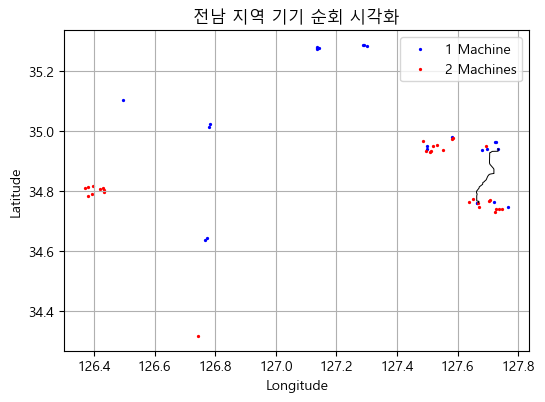

In [4]:
df1 = df[df.machine == 1]
df2 = df[df.machine == 2]

# figsize 비율 계산
ratio = (df.latitude.max() - df.latitude.min()) / (df.longitude.max() - df.longitude.min())
scale = 6

# fig, ax 객체 생성
fig, ax = plt.subplots(figsize=(scale, scale * ratio))

# 데이터 플롯
scatter1 = ax.scatter(df1['longitude'], df1['latitude'], s=1.8, c='blue', label='1 Machine')
scatter2 = ax.scatter(df2['longitude'], df2['latitude'], s=1.8, c='red', label='2 Machines')

# 축 레이블, 제목 및 범례 설정
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('전남 지역 기기 순회 시각화')
ax.grid()
ax.legend()

# 선분 플롯용 초기 빈 라인 객체 생성
line, = ax.plot([], [], linewidth=0.7, c='black')

# 각 경로 파일을 로드하여 애니메이션 프레임으로 사용
routes = []
for start_idx, goal_idx in total_route:
    if start_idx > goal_idx:
        start_idx, goal_idx = goal_idx, start_idx

    file_path = f"./../Data/routes/route_{start_idx}_{goal_idx}.json"
    
    with open(file_path, 'r') as file:
        data = json.load(file)
    route = data['route'][route_setting][0]['path']
    routes.append(route)

# 애니메이션 업데이트 함수
def update(frame):
    route = routes[frame]
    x_coords = [point[0] for point in route]
    y_coords = [point[1] for point in route]
    line.set_data(x_coords, y_coords)
    return line,

# 애니메이션 생성
ani = FuncAnimation(fig, update, frames=len(routes), blit=True, interval=1000)

# Jupyter Notebook에서 애니메이션을 표시하기 위해 HTML로 변환
HTML(ani.to_jshtml())